In [2]:
import numpy as np
print(f"Numpy version: {np.version.full_version}")
import scipy
print(f"Scipy version: {scipy.version.version}")
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fft, fftfreq

Numpy version: 1.22.1
Scipy version: 1.7.3


In [3]:
N = 600  # number of samples
T = 1. / 800  # sample spacing

F1 = 50
F2 = 100
F3 = 150

x = np.linspace(0.0, N * T, N, endpoint=False)
y = sum([np.sin(F * 2*np.pi*x) for F in [F1, F2, F3]])

xf = fftfreq(N, T)
yf = 2.0/N * np.abs(fft(y))

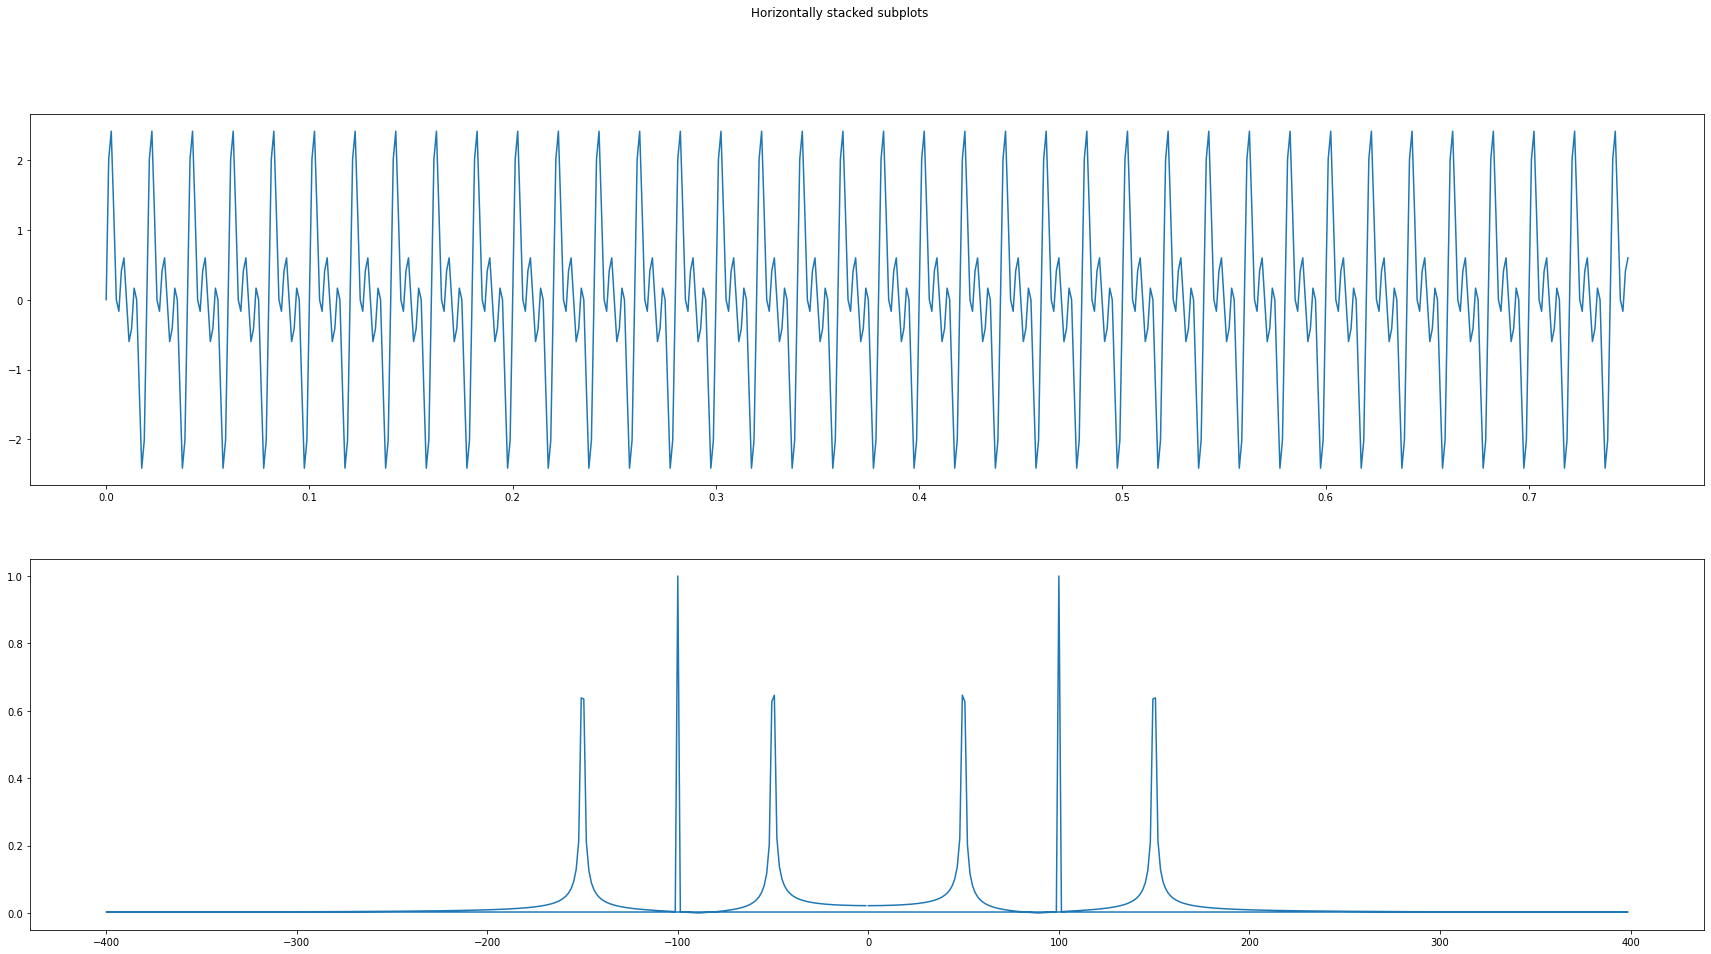

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(xf, yf)

d:\documents\fit_cvut\bap\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


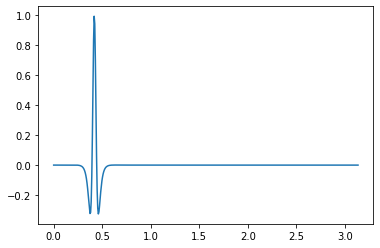

In [5]:
b, a = signal.gammatone(1000, 'iir', fs=15000)
w, h = signal.freqz(b, a)
plt.plot(w, h)

In [6]:
from scipy.io import wavfile
from os.path import join as pjoin
samplerate, data = wavfile.read(pjoin("..", "data", "FurElise.wav"))
length = data.shape[0] / samplerate
print(f"Length: {length}s")

Length: 176.5867573696145s


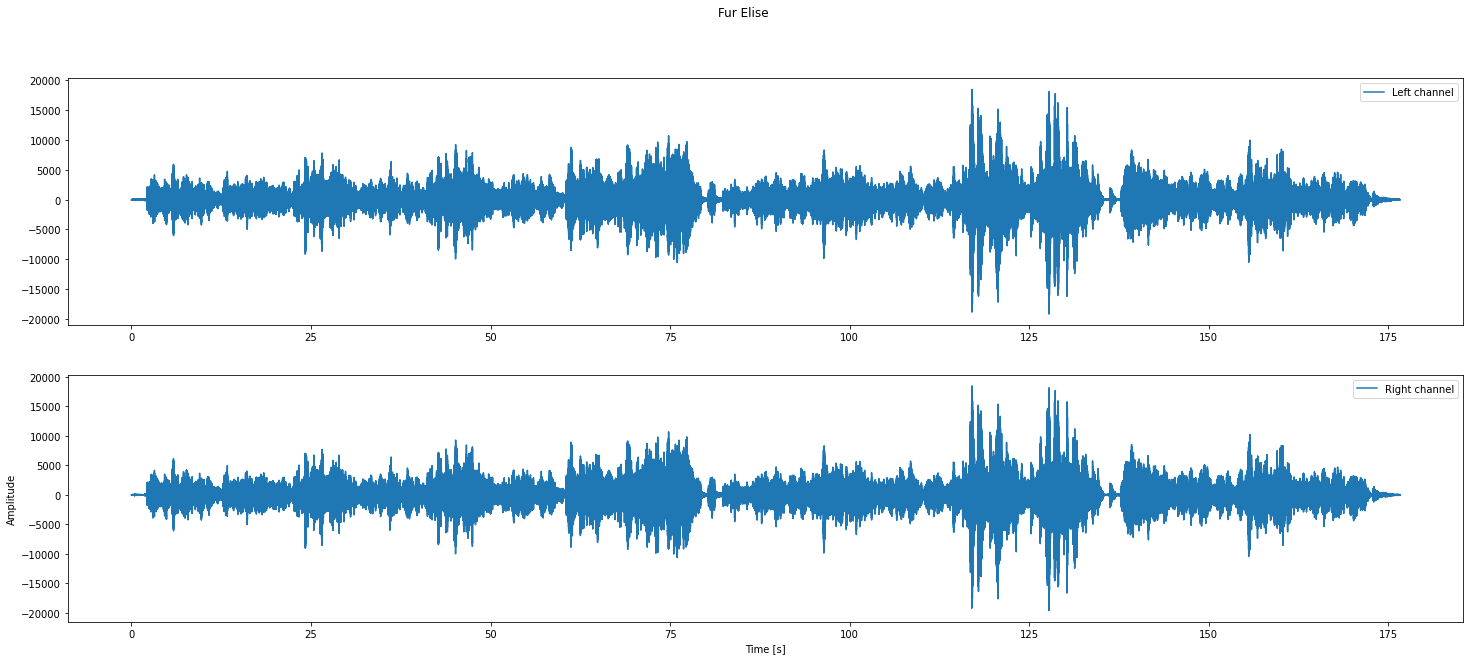

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
fig.suptitle('Fur Elise')

time_all = np.linspace(0., length, data.shape[0])
for ax, chan_num, name in [(ax1, 0, "Left channel"),
                           (ax2, 1, "Right channel")]:
    ax.plot(time_all, data[:, chan_num], label=name)
    ax.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.show()

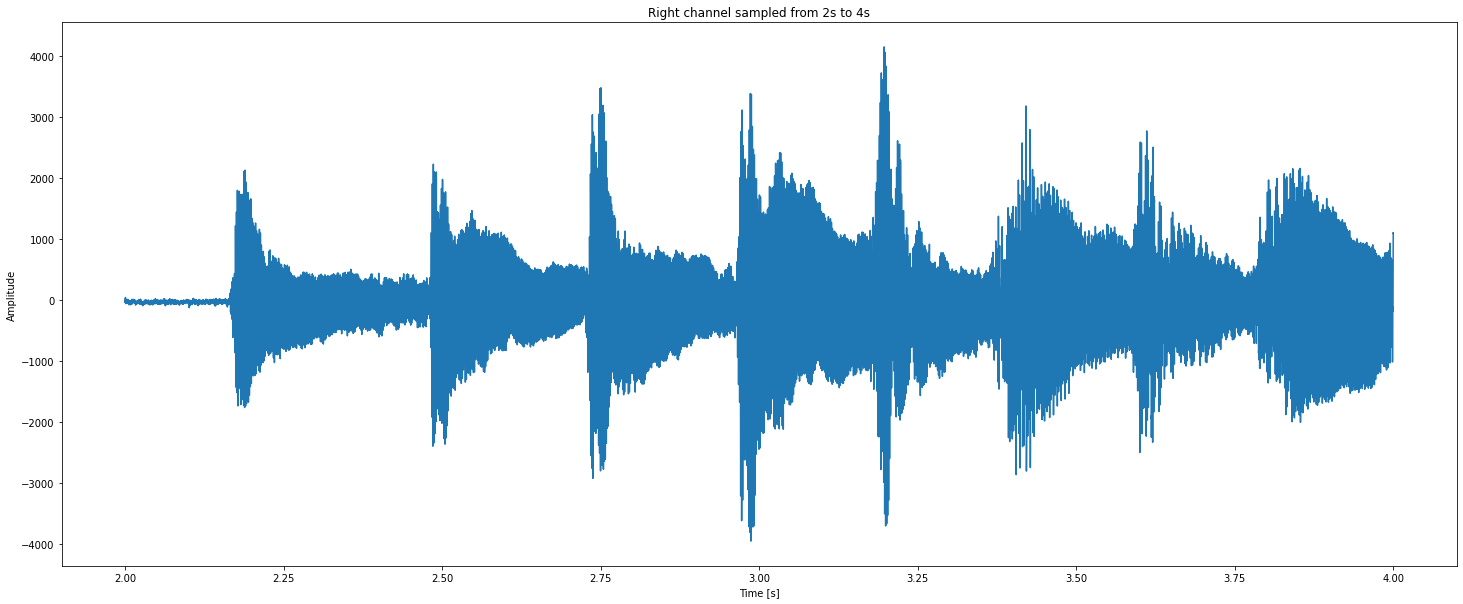

In [8]:
seconds_lo = 2
seconds_hi = 4
samples_lo = samplerate * seconds_lo
samples_hi = samplerate * seconds_hi
num_samples = samples_hi - samples_lo
time_interval = np.linspace(seconds_lo, seconds_hi, num_samples)

plt.figure(figsize=(25, 10))
plt.plot(time_interval, data[samples_lo:samples_hi, 1])
plt.title(f"Right channel sampled from {seconds_lo}s to {seconds_hi}s")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

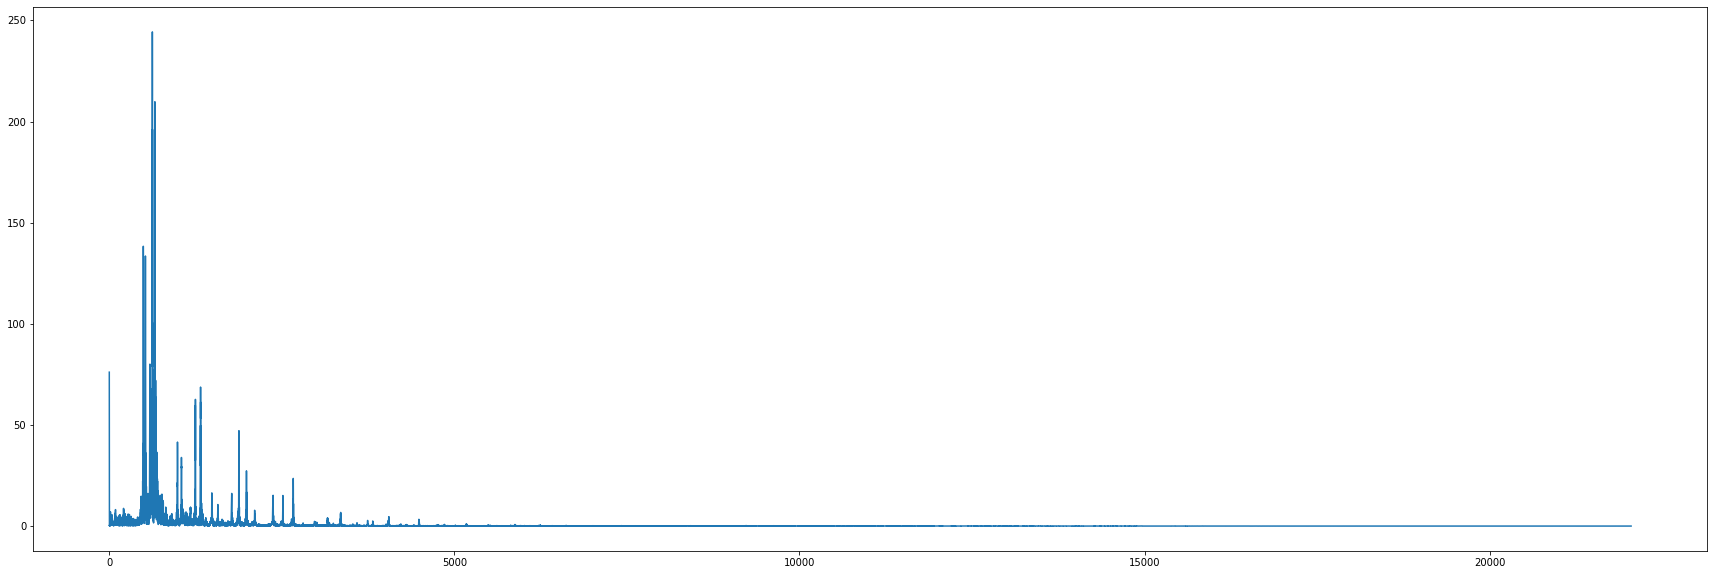

In [9]:
xf = fftfreq(num_samples, 1 / samplerate)[0:num_samples//2]
yf = 2.0/num_samples * np.abs(fft(data[samples_lo:samples_hi, 1]))[0:num_samples//2]

plt.figure(figsize=(30, 10))
plt.plot(xf, yf)
plt.show()

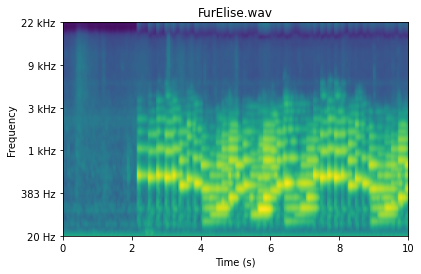

In [11]:
from gammatone.plot import render_audio_from_file
from gammatone.gtgram import gtgram
render_audio_from_file(pjoin("..", "data", "FurElise.wav"), 10, gtgram)